# Highlighting the dependence of ablation rate on the flux ratio (figure 8)

In [1]:
# Load required packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Use seaborn to make nice plots
sns.set_context("paper")
sns.set_style("ticks")

# Set colour palette for plots
UTcols = [
    "#EBBDA9", "#CF0072", "#4F2D7F", "#002C5F", "#0094B3", "#63B1E5", "#00675A", "#3F9C35",
    "#887B1B", "#FED100", "#EC7A08", "#C60C30", "#822433", "#513C40", "#616365", "#ADAFAF"
]
sns.set_palette(UTcols)
sns.color_palette(UTcols)

[(0.9215686274509803, 0.7411764705882353, 0.6627450980392157),
 (0.8117647058823529, 0.0, 0.4470588235294118),
 (0.30980392156862746, 0.17647058823529413, 0.4980392156862745),
 (0.0, 0.17254901960784313, 0.37254901960784315),
 (0.0, 0.5803921568627451, 0.7019607843137254),
 (0.38823529411764707, 0.6941176470588235, 0.8980392156862745),
 (0.0, 0.403921568627451, 0.35294117647058826),
 (0.24705882352941178, 0.611764705882353, 0.20784313725490197),
 (0.5333333333333333, 0.4823529411764706, 0.10588235294117647),
 (0.996078431372549, 0.8196078431372549, 0.0),
 (0.9254901960784314, 0.47843137254901963, 0.03137254901960784),
 (0.7764705882352941, 0.047058823529411764, 0.18823529411764706),
 (0.5098039215686274, 0.1411764705882353, 0.2),
 (0.3176470588235294, 0.23529411764705882, 0.25098039215686274),
 (0.3803921568627451, 0.38823529411764707, 0.396078431372549),
 (0.6784313725490196, 0.6862745098039216, 0.6862745098039216)]

#### Define physical input parameters

In [2]:
Lcp = 3.34e5/3974 # Latent heat by specific heat capacity [K]

g = 9.81 # gravitational acceleration [m/s^2]
β = 7.86e-4 # haline contraction coefficient [(g/kg)^-1]
ν = 1.95e-6 # kinematic viscosity [m^2/s]
κT = 1.41e-7 # thermal diffusivity [m^2/s]
κS = 8.02e-10 # solutal diffusivity [m^2/s]

λ = 5.73e-2 # liquidus slope [K / (g/kg)]

Le = κT/κS # Lewis number

Tf = 1 # ambient temperature [degree C]
Cf = 34.5 # ambient salinity [g/kg]

# Treat flux ratio R as an input variable
R = np.linspace(1, 15, 100)

#### Solve for interfacial scalar values

In [3]:
# Solve quadratic equation for interface salinity C_i
# in terms of R
# Equation (21) in the manuscript
a = Le/R*λ
b = Le/R*Tf + Lcp
c = -Lcp*Cf

Ci = (-b + (b**2 - 4*a*c)**0.5)/2/a

# Relate Ci to Ti using the liquidus condition
Ti = -λ*Ci

#### Assume classical convection scaling for salt flux to derive melt rate

In [4]:
# Assume salt flux satisfies Nu=0.1 Ra^(1/3) scaling relation
FC = 0.1*(g*β*κS**2/ν)**(1/3)*(Cf - Ci)**(4/3)

# Use salt flux and interface salinity to infer ablation rate m
# by conservation of solute mass
m = FC/Ci

#### Plot melt rate $m$ and interfacial salinity $C_i$ as they depend on flux ratio $R$

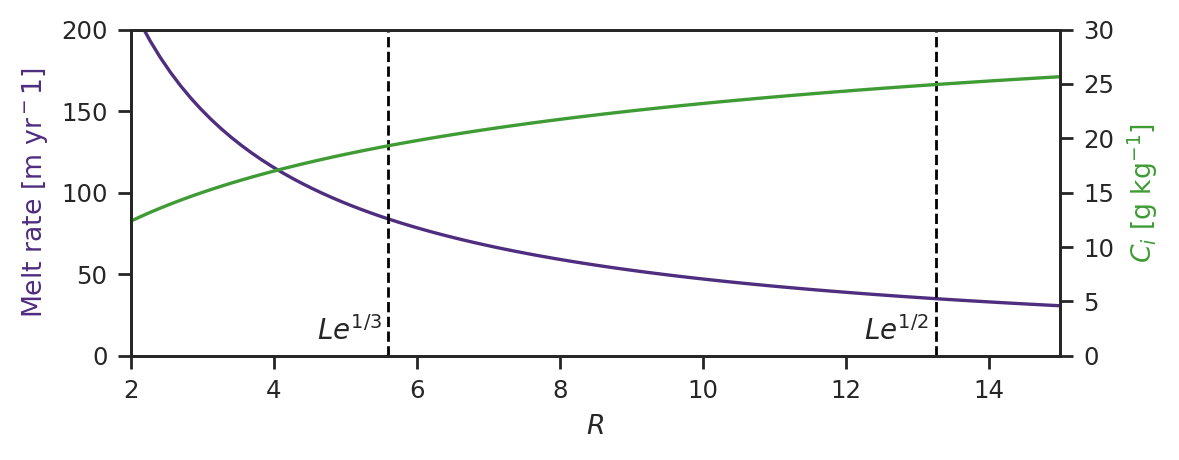

In [5]:
# Create figure
fig, ax = plt.subplots(dpi=200, figsize=(6.0,2.4))

# Use this factor to convert melt rate into metres per year
sec_in_yr = 60*60*24*365.25

# Plot melt rate as function of R
ax.plot(R, m*sec_in_yr, color="C2")

# Add axis labels and set limits
ax.set_xlabel('$R$')
ax.set_ylabel('Melt rate [$\mathrm{m \  yr}^-1$]', color="C2")
ax.set_ylim([0,200])
ax.set_xlim([2,15])

# Create new axis to plot C_i on same figure
ax2 = ax.twinx()
ax2.set_ylabel('$C_i$ [$\mathrm{g \ kg}^{-1}$]', color="C7")
ax2.plot(R, Ci, color="C7")
ax2.set_ylim([0,30])

# Highlight values of R used in common models/parameterisations
ax.plot(np.ones(10)*Le**(1/3), np.linspace(0,400,10), 'k--', lw=1)
ax.plot(np.ones(10)*Le**(1/2), np.linspace(0,400,10), 'k--', lw=1)
ax.annotate('$Le^{1/3}$',(Le**(1/3) - 1,10))
ax.annotate('$Le^{1/2}$',(Le**(1/2) - 1,10))

# Prevent labels getting cropped
fig.tight_layout()

# Save to file
# fig.savefig('melt_R_dep.pdf')
plt.show()